# Portfolio 4: Analysis of World Economic Classifications Dataset

### Prathamesh Tarde 

## Introduction
This file provides an overview of the analysis conducted on the World Economic Classifications dataset. The objective of this project is to explore various economic classifications and their implications on different countries. 

The dataset contains information sourced from the United Nations (UN) and the International Monetary Fund (IMF), providing classifications based on economic conditions, GDP per capita, G7 membership, EU membership, and fuel exporting status.

The link to this dataset can be found in the README file and the csv file will be comitted into the github repository.

## Dataset Overview
The dataset includes the following columns:
- `country_name`: Country name.
- `un_class_2014`: Economic classifications from the UN's Development Policy and Analysis Division (DPAD) for the year 2014.
- `imf_class_2023`: Economic classifications from the IMF's April 2023 report.
- `g7`: Denotes countries that are part of the G7.
- `eu_member`: Indicates EU membership status.
- `fuel_exp_country`: Indicates if the country is a fuel exporter.
- `wealth_rank`: Wealth ranking based on GDP at Purchasing Power Parity (PPP).
- `gdp_ppp_2022`: Per capita GDP at PPP as of 2022.
- `gdp_pc_2022`: Per capita GDP as of 2022.

## Analysis Objectives
The analysis will focus on the following objectives:
1. Explore the distribution of economic classifications (UN vs IMF).
2. Investigate the relationship between economic classifications and GDP per capita.

## Core Requirements:

1. Propose well-defined questions or purposes to the analysis
    - Requirement 1 has been met with the objectives stated above
    
2. It should involve some data preparation and exploration.

3. You will make use of at least one or more analysis/prediction techniques learned from the unit since week 7.

4. Develop some kind of visualisation of the data or performance evaluation results.


In [31]:
#Student Name: Prathamesh Tarde
#Student ID: 45946000

#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### Core Requirement (2):
- The following code block conducts data preperation and exploration on the dataset. 
- The code covers:
    - Variable Identification
    - Univariate Analysis
    - Missing value Treatment


In [61]:
# Dataset Load in
df = pd.read_csv("World Economic Classifications v2.csv")

# Displaying the first few rows of dataset
print("\nFirst Few Rows of the Dataset:\n",df.head())

# Displaying information about the variables in dataset
print("\nInformation on the Variables:\n" , df.info())

# Summary stats for numerical variables
print("\nSummary stats for numerical variables \n" , df.describe(exclude='object'))

# Frequency count for categorical variables
print("\nCountries in the different developing categories (UN):  \n" , df['un_class_2014'].value_counts())

# Check for missing values
print("\nMissing Values:\n" ,df.isnull().sum())


First Few Rows of the Dataset:
   country_name un_class_2014 imf_class_2023  g7 eu_member fuel_exp_country  \
0   Luxembourg     Developed       Advanced  No       Yes               No   
1    Singapore    Developing       Advanced  No        No               No   
2      Ireland     Developed       Advanced  No       Yes               No   
3       Norway     Developed       Advanced  No        No               No   
4        Qatar    Developing       Emerging  No        No              Yes   

   wealth_rank gdp_ppp_2022  gdp_pc_2022  
0          1.0  $142,214.00  $127,046.00  
1          2.0  $127,565.00   $78,115.00  
2          3.0  $126,905.00  $105,362.00  
3          4.0  $114,899.00  $106,594.00  
4          5.0  $114,648.00   $88,046.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_name      205 non-null    obj

### Core Requirement (2 & 4):
- This code block is a continuation of requirement 2 and satisfies requirement 4
- The scatter plot is a demonstration of bivariate analysis. 
- The plot highlights the relation ship between 'GDP per capita (PPP)' and 'Wealth Rank'

#### Analysis
- For countries with lower GDP per capita, there is a strong and consistent relation ship between GDP and the wealth rank. 
- The relationship between GDP and wealth rank become less consistent around the 90000 mark (GDP per capita)

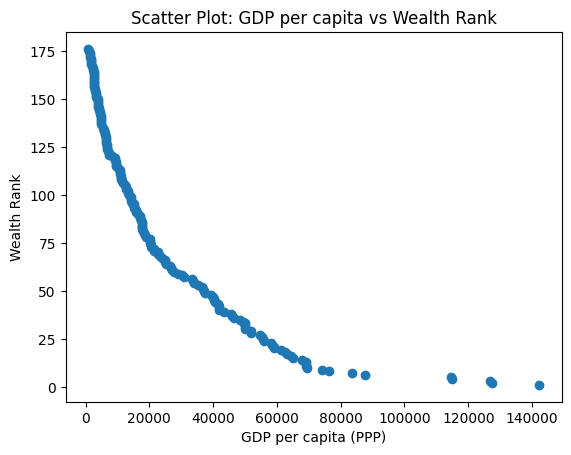

In [62]:
# Convert 'gdp_ppp_2022' and 'wealth_rank' to numeric data
df['gdp_ppp_2022'] = df['gdp_ppp_2022'].str.replace(',', '').str.replace('$', '').astype(float)
df['wealth_rank'] = pd.to_numeric(df['wealth_rank'], errors='coerce')

# Scatter plot between GDP per capita and Wealth Rank
plt.scatter(df['gdp_ppp_2022'], df['wealth_rank'])
plt.xlabel('GDP per capita (PPP)')
plt.ylabel('Wealth Rank')
plt.title('Scatter Plot: GDP per capita vs Wealth Rank')
plt.show()

### Core Requirement (4):
- The following code block visualises the relationship between economic classifications and the mean GDP per capita

#### Analysis
- 3 UN Classifications:
    - Developing - countries with developing economies
    - Developed - countries with develoed economies
    - Transition - countries transitioning from developing to developed
- 3 IMF Classifications:
    - Emerging - countries with economies that are transitioning from developing to developed
    - Advanced - countries that have highly developed economies
    - Developing - countires with developing economies
- The bar graphs display correct infomration as it aligns with expected patterns. The developed/advanced countries will have the highest mean gdp per capita and the developing countries will have the lowest. The transition/emerging countries will have a slightly higher mean gdp then the developing due to them being in that transitionary period from developing to developed

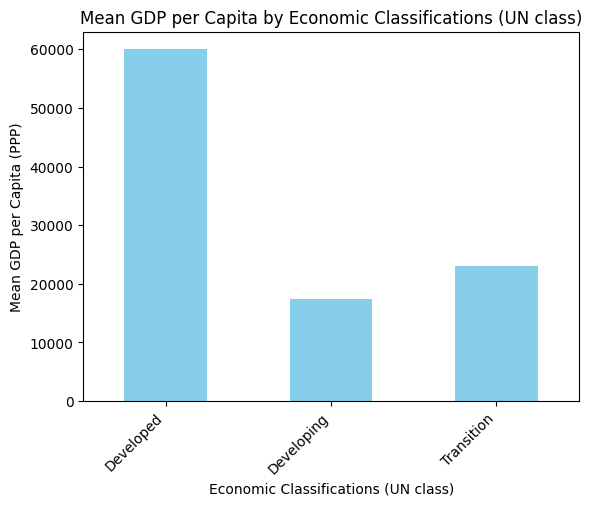

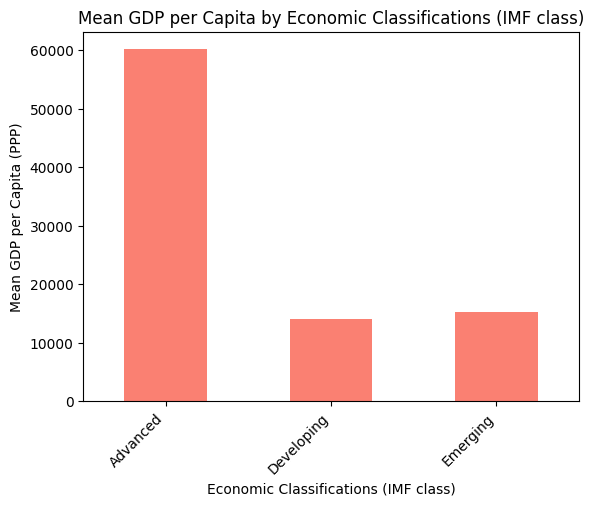

In [75]:
#UN standards
# Grouping the data by economic classifications + calculate mean GDP per capita for UN
mean_gdp_by_class = df.groupby('un_class_2014')['gdp_ppp_2022'].mean()

# bar plot
mean_gdp_by_class.plot(kind='bar', color='skyblue')
plt.title('Mean GDP per Capita by Economic Classifications (UN class)')
plt.xlabel('Economic Classifications (UN class)')
plt.ylabel('Mean GDP per Capita (PPP)')
plt.xticks(rotation=45, ha='right')
plt.show()

#IMF standards
# Grouping the data by economic classifications + calculating mean GDP per capita for IMF dataset
mean_gdp_by_class_imf = df.groupby('imf_class_2023')['gdp_ppp_2022'].mean()

# bar plot
mean_gdp_by_class_imf.plot(kind='bar', color='salmon')
plt.title('Mean GDP per Capita by Economic Classifications (IMF class)')
plt.xlabel('Economic Classifications (IMF class)')
plt.ylabel('Mean GDP per Capita (PPP)')
plt.xticks(rotation=45, ha='right')
plt.show()


### Core Requirement (4):
- The following code block visualises the distrubition of economic classifications from both the United Nations (UN) and the International Moneteray Fund (IMF)

#### Analysis:
- Both graphs display a high frequency of countries catagorised in their developing/emerging classifications. The IMF standard has a higher frequency of countries in this classification
- While the advanced/developed bar has a similar number of frequencies, the discrepency in the other two classifications highlights how UN and IMF use different methods to classify a country by their economy 

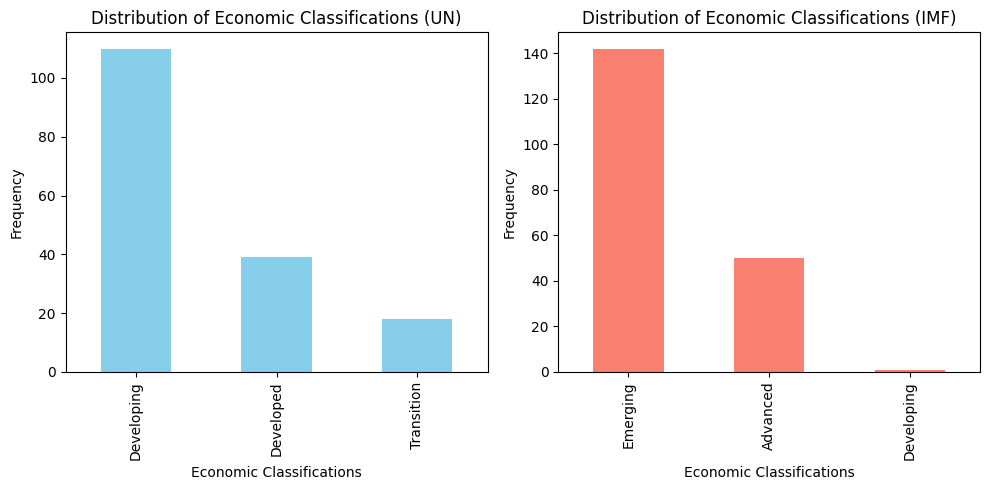

In [28]:
# Visualise the distribution of economic classifications (UN vs IMF)
plt.figure(figsize=(10, 5))

# Bar plot for UN economic classifications
plt.subplot(1, 2, 1)
df['un_class_2014'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Economic Classifications (UN)')
plt.xlabel('Economic Classifications')
plt.ylabel('Frequency')

# Bar plot for IMF economic classifications
plt.subplot(1, 2, 2)
df['imf_class_2023'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Economic Classifications (IMF)')
plt.xlabel('Economic Classifications')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Core Requirement (3):
- The following code block satisfies requirement 3 by making use of 2 different techniques:
    - Linear Regression
    - Polynomial Regression

#### Analysis:
- The analysis' goal is to assess the performance of the regression models in predicting the wealth rank based on the GDP per capita variable. 
- The Linear Regression results indicate that the model has a higher MSE on both the training and testing datasets. Relatively high MSE suggests that the model may not be capturing the underlying relationship between GDP and wealth rank very accurately
- The Polynomial regression results have a better performance with their MSE values being significntly lower. This model may be a better fit for the goal of the analysis

In [73]:

# remove rows with missing values for the selected features
df_regression = df.dropna(subset=['gdp_ppp_2022', 'wealth_rank'])

# Split data into features (X) and target (y)
X = df_regression['gdp_ppp_2022'].values.reshape(-1, 1)  # Reshape for single feature
y = df_regression['wealth_rank'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_train_pred = linear_model.predict(X_train)
linear_test_pred = linear_model.predict(X_test)
linear_train_mse = mean_squared_error(y_train, linear_train_pred)
linear_test_mse = mean_squared_error(y_test, linear_test_pred)
print("Linear Regression Train MSE:", linear_train_mse)
print("Linear Regression Test MSE:", linear_test_mse)

# Polynomial Regression:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_train_pred = poly_model.predict(X_poly_train)
poly_test_pred = poly_model.predict(X_poly_test)
poly_train_mse = mean_squared_error(y_train, poly_train_pred)
poly_test_mse = mean_squared_error(y_test, poly_test_pred)
print("Polynomial Regression Train MSE:", poly_train_mse)
print("Polynomial Regression Test MSE:", poly_test_mse)


Linear Regression Train MSE: 653.3723196113378
Linear Regression Test MSE: 407.6579815803495
Polynomial Regression Train MSE: 136.82799394717622
Polynomial Regression Test MSE: 80.59935309338235


### Core Requirement (4):
- The following code block displays 2 scatter plots that visualise the relationship between GDP per capita and wealth rank based on training + testing datasets (identified in previous code block)

#### Analysis:
- The tight clustering of points for the training data plot indicates that the model has learnt well from the training data
- The spread out clustering on the testing data plot indicates that the predictions made by the model are less consistent


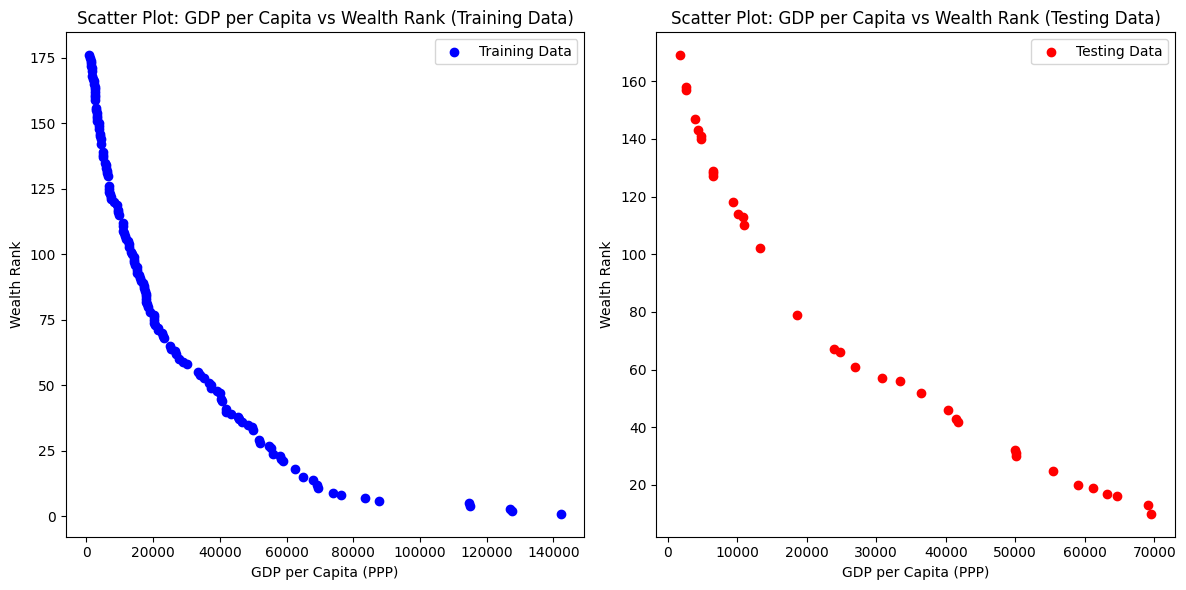

In [74]:
# Scatter plots of GDP per capita against wealth rank for both training and testing data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.title('Scatter Plot: GDP per Capita vs Wealth Rank (Training Data)')
plt.xlabel('GDP per Capita (PPP)')
plt.ylabel('Wealth Rank')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.title('Scatter Plot: GDP per Capita vs Wealth Rank (Testing Data)')
plt.xlabel('GDP per Capita (PPP)')
plt.ylabel('Wealth Rank')
plt.legend()

plt.tight_layout()
plt.show()

